# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Febriyadi
- **Email Cohort:** mc323d5y0358@student.devacademy.id
- **Email dicoding:** febriyadibangkit@gmail.com
- **ID Dicoding:** FEBRIYADI

In [29]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Menentukan Pertanyaan Bisnis

1. Bagaimana pola perubahan penggunaan sepeda dalam setiap musim (*season*), dan apakah pola tersebut konsisten dari tahun ke tahun?
2.  Bagaimana hubungan antara kondisi cuaca (kelembaban, suhu, kecepatan angin) dengan jumlah pengguna sepeda setiap harinya?



## Import Semua Packages/Library yang Digunakan

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [31]:
day_df = pd.read_csv('/content/drive/MyDrive/submission/data/day.csv', delimiter=',')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [32]:
hour_df = pd.read_csv('/content/drive/MyDrive/submission/data/hour.csv', delimiter=',')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- `hour_df` berisi informasi tentang penggunaan sepeda per jam. Kolom-kolomnya mirip dengan dataset `day_df`, namun ada tambahan kolom `hr` yang menunjukkan jam dalam sehari (0 hingga 23).
- Kolom `season` menunjukkan ada 4 musim yang berbeda, yang kemungkinan mewakili **musim semi, panas, gugur,** dan **dingin**.
- Kolom `yr` menunjukkan dua kategori, yaitu tahun 0 (2011) dan tahun 1 (2012).

### Assessing Data

In [33]:
print("Jumlah data Hari yang null: ", day_df.isnull().sum())
print("Jumlah data Jam yang null: ", hour_df.isnull().sum())

Jumlah data Hari yang null:  instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Jumlah data Jam yang null:  instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [34]:
print("Jumlah data Hari yang duplikat: ", day_df.duplicated().sum())
print("Jumlah data Jam yang duplikat: ", hour_df.duplicated().sum())

Jumlah data Hari yang duplikat:  0
Jumlah data Jam yang duplikat:  0


In [35]:
def detect_outliers_iqr(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    return outliers, lower_bound, upper_bound


outliers_cnt, lower_cnt, upper_cnt = detect_outliers_iqr(day_df, 'cnt')
outliers_temp, lower_temp, upper_temp = detect_outliers_iqr(day_df, 'temp')
outliers_apparent_temp, lower_apparent_temp, upper_apparent_temp = detect_outliers_iqr(day_df, 'atemp')
outliers_humidity, lower_humidity, upper_humidity = detect_outliers_iqr(day_df, 'hum')
outliers_windspeed, lower_windspeed, upper_windspeed = detect_outliers_iqr(day_df, 'windspeed')

print(f'Outliers pada kolom cnt: {outliers_cnt.shape[0]} data')
print(f'Outliers pada kolom temperature: {outliers_temp.shape[0]} data')
print(f'Outliers pada kolom apparent_temperature: {outliers_apparent_temp.shape[0]} data')
print(f'Outliers pada kolom humidity: {outliers_humidity.shape[0]} data')
print(f'Outliers pada kolom windspeed: {outliers_windspeed.shape[0]} data')

Outliers pada kolom cnt: 0 data
Outliers pada kolom temperature: 0 data
Outliers pada kolom apparent_temperature: 0 data
Outliers pada kolom humidity: 2 data
Outliers pada kolom windspeed: 13 data


**Insight:**
- Dari 2 dataset dapat dikatakan sebagai dataset yang cukup bersih karena tidak ada **missing value** dan **duplicated data**

- Tidak ada outliers pada kolom `cnt`, yang menunjukkan bahwa jumlah pengguna sepeda setiap hari relatif **stabil** dan **konsisten**. Selain itu, tidak ditemukan outliers pada kolom **`temperature`** dan **`apparent_temperature`**, yang berarti suhu dan suhu terasa berada dalam kisaran normal. Namun, ditemukan 2 outliers pada kolom `humidity` yang menunjukkan kelembaban ekstrem, serta 13 outliers pada kolom `windspeed`, yang menunjukkan kecepatan angin yang sangat tinggi, keduanya berpotensi mempengaruhi  jumlah pengguna sepeda.

### Cleaning Data

1. Mengubah Tipe Data kolom `dteday`

In [36]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
day_df.info()

hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa



##### 2. Mengganti label & value tabel yang relevan di kedua tabel




In [37]:
day_df.columns = ['record_id', 'date', 'season', 'year', 'month', 'is_holiday', 'day', 'is_working_day', 'weather_condition',
                  'temperature', 'apparent_temperature', 'humidity', 'windspeed', 'total_casual_riders',
                  'total_registered_riders', 'total_riders']
day_df.head()

,record_id,date,season,year,month,is_holiday,day,is_working_day,weather_condition,temperature,apparent_temperature,humidity,windspeed,total_casual_riders,total_registered_riders,total_riders
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [38]:
hour_df.columns = [
    'record_id', 'date', 'season', 'year', 'month', 'hour',
    'is_holiday', 'day', 'is_working_day', 'weather_condition',
    'temperature', 'apparent_temperature', 'humidity', 'windspeed',
    'total_casual_riders', 'total_registered_riders', 'total_riders'
]

hour_df.head()

,record_id,date,season,year,month,hour,is_holiday,day,is_working_day,weather_condition,temperature,apparent_temperature,humidity,windspeed,total_casual_riders,total_registered_riders,total_riders
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [39]:
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

year_mapping = {
    0: 2011,
    1: 2012
}

month_mapping = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}

weekday_mapping = {
    0: "Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
}

weather_condition_mapping = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Mist',
    4: 'Rain'
}


day_df['season'] = day_df['season'].map(season_mapping)
day_df['weather_condition'] = day_df['weather_condition'].map(weather_condition_mapping)
day_df['month'] = day_df['month'].map(month_mapping)
day_df['year'] = day_df['year'].map(year_mapping)
day_df['day'] = day_df['day'].map(weekday_mapping)


hour_df['season'] = hour_df['season'].map(season_mapping)
hour_df['weather_condition'] = hour_df['weather_condition'].map(weather_condition_mapping)
hour_df['month'] = hour_df['month'].map(month_mapping)
hour_df['year'] = hour_df['year'].map(year_mapping)
hour_df['day'] = hour_df['day'].map(weekday_mapping)

In [40]:
day_df.head()

,record_id,date,season,year,month,is_holiday,day,is_working_day,weather_condition,temperature,apparent_temperature,humidity,windspeed,total_casual_riders,total_registered_riders,total_riders
0,1,2011-01-01,spring,2011,January,0,Saturday,0,Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,spring,2011,January,0,Sunday,0,Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,spring,2011,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,spring,2011,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,spring,2011,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [41]:
hour_df.head()

,record_id,date,season,year,month,hour,is_holiday,day,is_working_day,weather_condition,temperature,apparent_temperature,humidity,windspeed,total_casual_riders,total_registered_riders,total_riders
0,1,2011-01-01,spring,2011,January,0,0,Saturday,0,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,spring,2011,January,1,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,spring,2011,January,2,0,Saturday,0,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,spring,2011,January,3,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,spring,2011,January,4,0,Saturday,0,Clear,0.24,0.2879,0.75,0.0,0,1,1


In [42]:
day_df["temperature"] = day_df["temperature"] * 41
day_df["apparent_temperature"] = day_df["apparent_temperature"] * 50
day_df["windspeed"] = day_df["windspeed"] * 67
day_df["humidity"] = day_df["humidity"]*100

hour_df["temperature"] = hour_df["temperature"] * 41
hour_df["apparent_temperature"] = hour_df["apparent_temperature"] * 50
hour_df["windspeed"] = hour_df["windspeed"] * 67
hour_df["humidity"] = hour_df["humidity"]*100

In [43]:
day_df.to_csv('/content/drive/MyDrive/submission/data/cleaned_day.csv', index=False)
hour_df.to_csv('/content/drive/MyDrive/submission/data/cleaned_hour.csv', index=False)

**Insight:**
- Mengubah tipe data `dteday` menjadi `datatime`
- Mengubah label kolom yang lebih relevan agar memudahkan membaca datanya.
- Converting normalized value (temperature,apparent_temperature, feeling_temperature, dan wind_speed) menjadikan valuenya mudah dipahami

## Exploratory Data Analysis (EDA)

### Explore ...

Memuat dataset yang telah di lakukan proses **Cleaning Data**

In [44]:
day_clean_df = pd.read_csv('/content/drive/MyDrive/submission/data/cleaned_day.csv', delimiter=',', parse_dates=['date'])
day_clean_df.info()
day_clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   record_id                731 non-null    int64         
 1   date                     731 non-null    datetime64[ns]
 2   season                   731 non-null    object        
 3   year                     731 non-null    int64         
 4   month                    731 non-null    object        
 5   is_holiday               731 non-null    int64         
 6   day                      731 non-null    object        
 7   is_working_day           731 non-null    int64         
 8   weather_condition        731 non-null    object        
 9   temperature              731 non-null    float64       
 10  apparent_temperature     731 non-null    float64       
 11  humidity                 731 non-null    float64       
 12  windspeed                731 non-nul

,record_id,date,season,year,month,is_holiday,day,is_working_day,weather_condition,temperature,apparent_temperature,humidity,windspeed,total_casual_riders,total_registered_riders,total_riders
0,1,2011-01-01,spring,2011,January,0,Saturday,0,Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,spring,2011,January,0,Sunday,0,Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,spring,2011,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,spring,2011,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,spring,2011,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [45]:
hour_clean_df = pd.read_csv('/content/drive/MyDrive/submission/data/cleaned_hour.csv', delimiter=',', parse_dates=['date'])
hour_clean_df.info()
hour_clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   record_id                17379 non-null  int64         
 1   date                     17379 non-null  datetime64[ns]
 2   season                   17379 non-null  object        
 3   year                     17379 non-null  int64         
 4   month                    17379 non-null  object        
 5   hour                     17379 non-null  int64         
 6   is_holiday               17379 non-null  int64         
 7   day                      17379 non-null  object        
 8   is_working_day           17379 non-null  int64         
 9   weather_condition        17379 non-null  object        
 10  temperature              17379 non-null  float64       
 11  apparent_temperature     17379 non-null  float64       
 12  humidity                 17379 n

,record_id,date,season,year,month,hour,is_holiday,day,is_working_day,weather_condition,temperature,apparent_temperature,humidity,windspeed,total_casual_riders,total_registered_riders,total_riders
0,1,2011-01-01,spring,2011,January,0,0,Saturday,0,Clear,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,spring,2011,January,1,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,spring,2011,January,2,0,Saturday,0,Clear,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,spring,2011,January,3,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,spring,2011,January,4,0,Saturday,0,Clear,9.84,14.395,75.0,0.0,0,1,1


In [46]:
day_clean_df.describe(include="all")

,record_id,date,season,year,month,is_holiday,day,is_working_day,weather_condition,temperature,apparent_temperature,humidity,windspeed,total_casual_riders,total_registered_riders,total_riders
count,731.000000,731,731,731.000000,731,731.000000,731,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,NaN,7,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,January,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,NaN,105,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,0.028728,NaN,0.683995,NaN,20.310776,23.717699,62.789406,12.762576,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,0.000000,NaN,0.000000,NaN,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,0.000000,NaN,1.000000,NaN,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,1.000000,NaN,1.000000,NaN,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [47]:
hour_clean_df.describe(include="all")

,record_id,date,season,year,month,hour,is_holiday,day,is_working_day,weather_condition,temperature,apparent_temperature,humidity,windspeed,total_casual_riders,total_registered_riders,total_riders
count,17379.0000,17379,17379,17379.000000,17379,17379.000000,17379.000000,17379,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,4,NaN,12,NaN,NaN,7,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,fall,NaN,July,NaN,NaN,Saturday,NaN,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4496,NaN,1488,NaN,NaN,2512,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,NaN,0.682721,NaN,20.376474,23.788755,62.722884,12.736540,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,NaN,0.000000,NaN,0.820000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,NaN,0.000000,NaN,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,NaN,1.000000,NaN,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,NaN,1.000000,NaN,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,NaN,1.000000,NaN,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000


Menghubungkan Musim dan Tahun

In [48]:
year_season_trends = day_clean_df.groupby(['year', 'season']).agg({
    "total_casual_riders": "sum",
    "total_registered_riders": "sum",
    "total_riders": "sum"
}).reindex()

year_season_trends.head()

total_casual_riders  total_registered_riders  total_riders
year season                                                            
2011 fall                  95450                   324200        419650
     spring                21425                   128575        150000
     summer                77564                   269752        347316
     winter                52813                   273324        326137
2012 fall                 130641                   510838        641479

**Insight:**
1.   Pola penggunaan sepeda antara tahun **2011**  dan **2012**, terutama di musim gugur dan musim panas. Musim `fall` dan `summer` menunjukkan angka yang tinggi dan cenderung stabil.
2. Peningkatan dalam jumlah pengguna sepeda antara tahun **2011** dan **2012** di semua musim, terutama di musim `fall` yang menunjukkan peningkatan signifikan pada **2012**.


Hubungan Cuaca dan Jumlah Pengguna Sepeda

In [49]:
weather_rental_correlation = day_clean_df.groupby(['day', 'date', 'temperature', 'apparent_temperature', 'humidity','windspeed']).agg({
    'total_riders': 'sum'
}).round().sort_values(by='date', ascending=False)
weather_rental_correlation.head()

,,,,,,total_riders
day,date,temperature,apparent_temperature,humidity,windspeed,
Monday,2012-12-31,8.849153,11.17435,57.7500,10.374682,2729
Sunday,2012-12-30,10.489153,11.58500,48.3333,23.500518,1796
Saturday,2012-12-29,10.386653,12.12000,75.2917,8.333661,1341
Friday,2012-12-28,10.386653,12.75230,59.0000,10.416557,3095
Thursday,2012-12-27,10.420847,11.33210,65.2917,23.458911,2114


In [50]:
weather_rental_correlation_day = day_clean_df.groupby('day').agg({
    'temperature': 'mean',
    'apparent_temperature': 'mean',
    'humidity': 'mean',
    'windspeed': 'mean',
    'total_riders': 'sum'
}).reindex()
weather_rental_correlation_day.head()

,temperature,apparent_temperature,humidity,windspeed,total_riders
day,,,,,
Friday,20.319167,23.555589,61.375575,12.488046,487790
Monday,20.231424,23.728136,63.757653,12.776273,455503
Saturday,19.763557,23.103570,61.956025,13.171365,477807
Sunday,19.828732,23.264386,62.765877,12.631502,444027
Thursday,20.678002,24.135014,60.949903,12.837406,485395


**Insight:**
- Penggunaan sepeda lebih tinggi pada hari-hari dengan suhu moderat (sekitar 20°C) dan kelembaban sekitar 60%-64%, seperti yang terlihat pada hari Jumat dan Senin.
- Kecepatan angin moderat (sekitar 12 - 13 km/h) tidak tampak memiliki dampak signifikan terhadap penggunaan sepeda.
- Hari Jumat cenderung memiliki jumlah penyewa sepeda yang lebih tinggi, mungkin terkait dengan orang-orang yang lebih aktif bersepeda di akhir pekan, terutama pada cuaca yang nyaman.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana pola perubahan penggunaan sepeda dalam setiap musim (season), dan apakah pola tersebut konsisten dari tahun ke tahun?

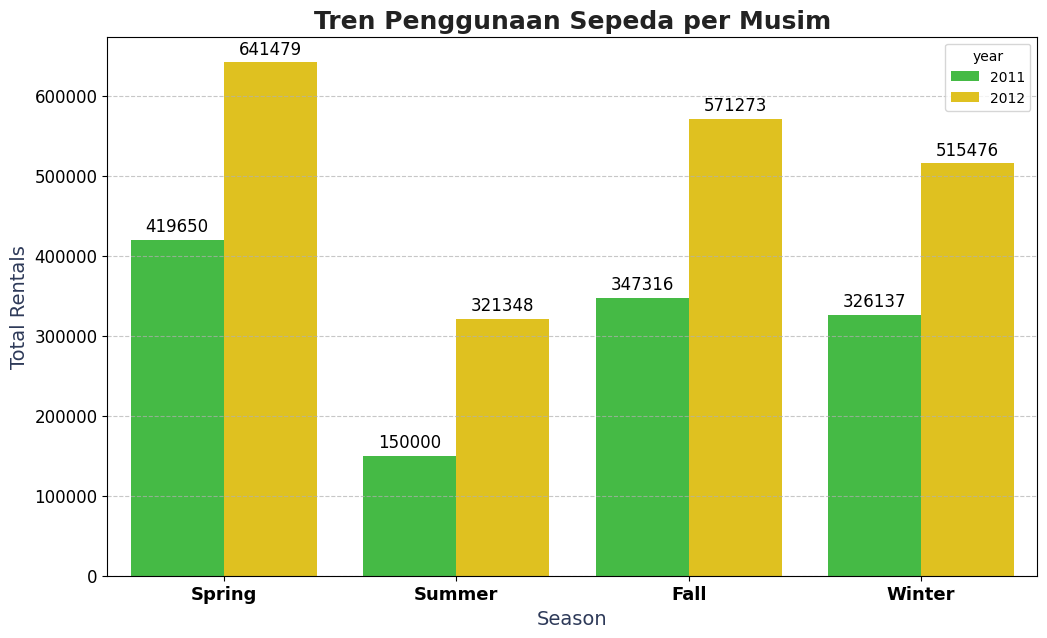

In [51]:
green_yellow_palette = ["#32CD32", "#FFD700"]

fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(data=year_season_trends, x="season", y="total_riders", hue="year", palette=green_yellow_palette, ax=ax)

for container in ax.containers:
    ax.bar_label(container, fontsize=12, color='black', padding=3)

ax.set_title("Tren Penggunaan Sepeda per Musim", fontsize=18, weight='bold', color='#222222')
ax.set_xlabel("Season", fontsize=14, color='#2E3A59')
ax.set_ylabel("Total Rentals", fontsize=14, color='#2E3A59')

ax.tick_params(axis='x', labelsize=12, rotation=0)
ax.tick_params(axis='y', labelsize=12)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(["Spring", "Summer", "Fall", "Winter"], fontsize=13, weight='bold')

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight:**
- Pola penggunaan sepeda menunjukkan peningkatan dari tahun ke tahun pada musim-musim tertentu, terutama pada musim semi dan musim gugur.
- Musim panas dan musim dingin menunjukkan peningkatan yang lebih besar pada tahun 2012, tetapi tren penggunaan sepeda masih terbilang lebih stabil di musim gugur.
- Perubahan penggunaan sepeda setiap musim memperlihatkan konsistensi dalam preferensi pengguna, dengan musim semi menjadi musim yang paling diminati untuk bersepeda.

### Pertanyaan 2:
Bagaimana hubungan antara kondisi cuaca (kelembaban, suhu, kecepatan angin) dengan jumlah pengguna sepeda setiap harinya?

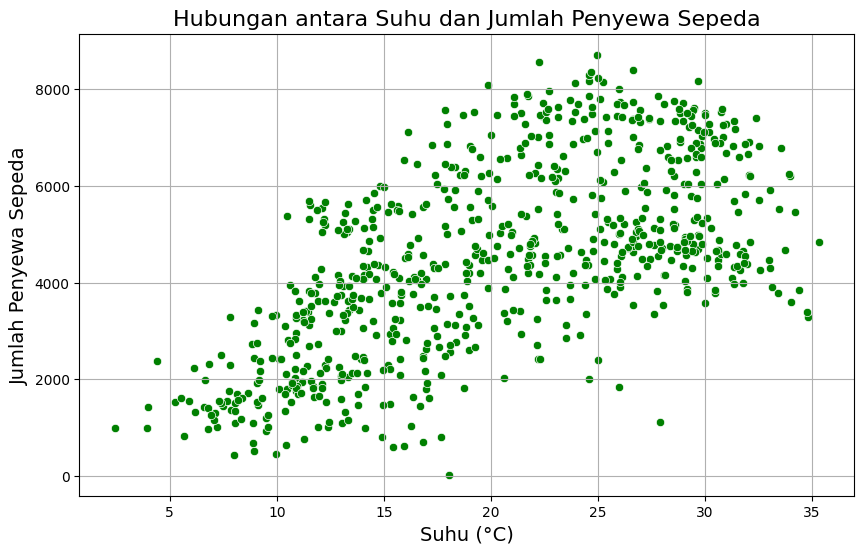

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_rental_correlation, x='temperature', y='total_riders', color='green')
plt.title('Hubungan antara Suhu dan Jumlah Penyewa Sepeda', fontsize=16)
plt.xlabel('Suhu (°C)', fontsize=14)
plt.ylabel('Jumlah Penyewa Sepeda', fontsize=14)
plt.grid(True)
plt.show()

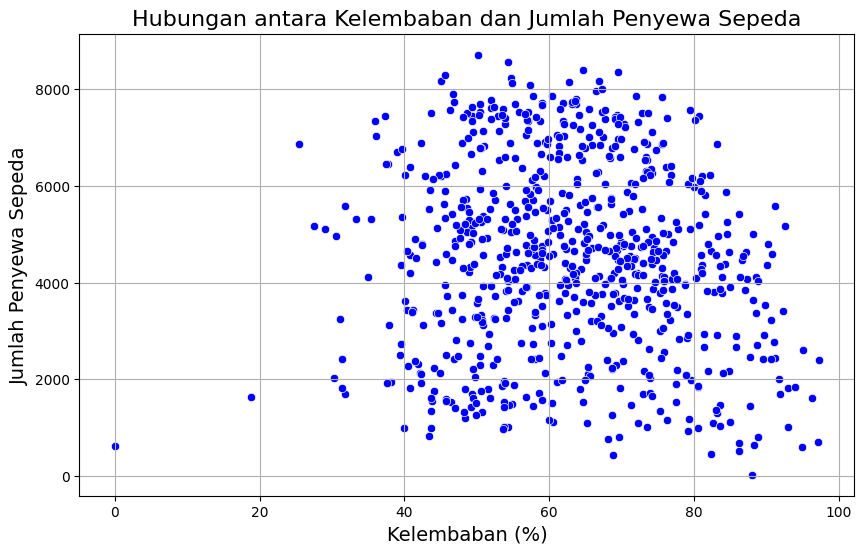

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_rental_correlation, x='humidity', y='total_riders', color='blue')
plt.title('Hubungan antara Kelembaban dan Jumlah Penyewa Sepeda', fontsize=16)
plt.xlabel('Kelembaban (%)', fontsize=14)
plt.ylabel('Jumlah Penyewa Sepeda', fontsize=14)
plt.grid(True)
plt.show()

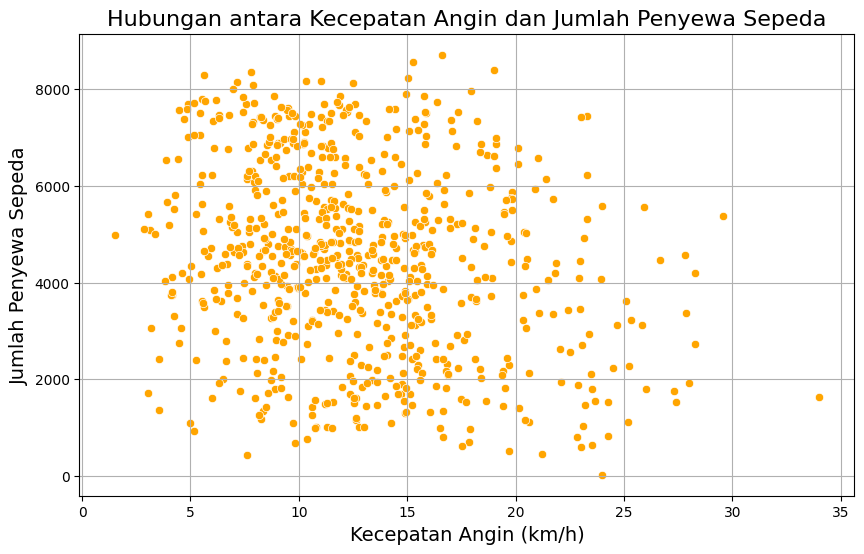

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weather_rental_correlation, x='windspeed', y='total_riders', color='orange')
plt.title('Hubungan antara Kecepatan Angin dan Jumlah Penyewa Sepeda', fontsize=16)
plt.xlabel('Kecepatan Angin (km/h)', fontsize=14)
plt.ylabel('Jumlah Penyewa Sepeda', fontsize=14)
plt.grid(True)
plt.show()

In [55]:
correlation_day = weather_rental_correlation_day[['temperature', 'apparent_temperature', 'humidity', 'windspeed', 'total_riders']].corr()

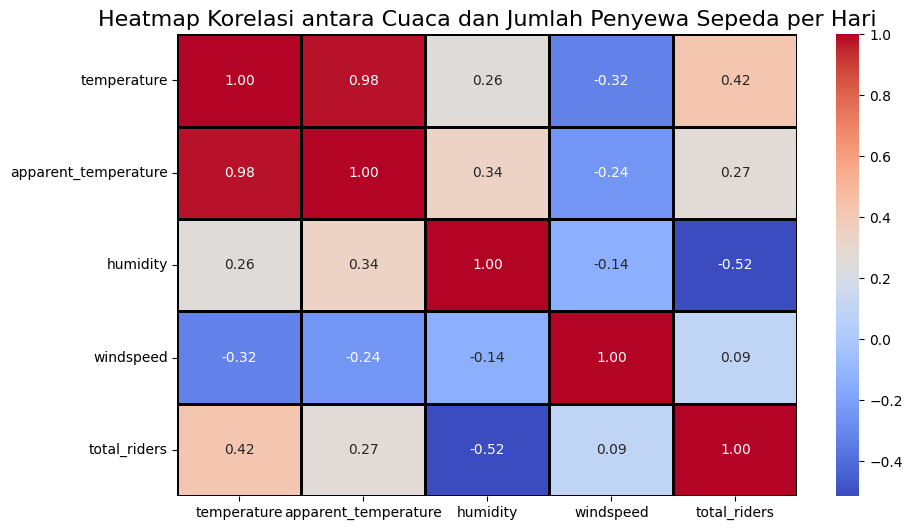

In [56]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_day, annot=True, cmap='coolwarm', fmt=".2f", linewidths=1, linecolor='black')
plt.title('Heatmap Korelasi antara Cuaca dan Jumlah Penyewa Sepeda per Hari', fontsize=16)
plt.show()

**Insight:**
- Suhu lebih tinggi meningkatkan minat bersepeda. Namun, kelembaban yang tinggi mengurangi jumlah penyewa sepeda secara signifikan.
- Kecepatan angin tidak memiliki pengaruh yang kuat terhadap keputusan orang untuk bersepeda, meskipun sedikit mempengaruhi kenyamanan.
- Korelasi antara suhu yang terasa dan suhu asli sangat kuat, sehingga perubahan suhu terasa cenderung berbanding lurus dengan perubahan suhu aktual.

## Analisis Lanjutan (Opsional)

## Conclusion

**BUSINESS QUESTION**
1. Bagaimana pola perubahan penggunaan sepeda dalam setiap
musim (*season*), dan apakah pola tersebut konsisten dari tahun ke tahun?

2. Bagaimana hubungan antara kondisi cuaca (kelembaban, suhu, kecepatan angin) dengan jumlah pengguna sepeda setiap harinya?

**EXPLANATION**
1. Pola Perubahan Penggunaan Sepeda per Musim (*Season*):
  *   Penggunaan sepeda cenderung **lebih tinggi pada musim semi** dan **musim gugur**. Musim semi (*Spring*) pada tahun 2012 mengalami **peningkatan signifikan** dibandingkan tahun 2011, dengan **641,479 penyewa** pada tahun 2012, yang menunjukkan bahwa penggunaan sepeda meningkat pada musim ini.
  *   Musim **gugur (Fall)** juga menunjukkan **peningkatan jumlah penyewa sepeda** pada tahun 2012 **(571,273 penyewa)** dibandingkan dengan tahun 2011 (347,316 penyewa). Ini mengindikasikan bahwa **pengguna sepeda** lebih stabil dan cenderung meningkat di musim ini.
  *   **Musim panas (*Summer*)** menunjukkan angka penyewaan sepeda yang lebih rendah, namun tetap ada **peningkatan pada tahun 2012** meskipun relatif moderat dibandingkan dengan musim lainnya.
  *   Musim dingin (Winter) menunjukkan penurunan jumlah penyewa sepeda, tetapi masih ada peningkatan pada tahun 2012 dibandingkan dengan 2011.



2. Hubungan Antara Kondisi Cuaca dan Penggunaan Sepeda:

 *   **Suhu** yang lebih tinggi, terutama di kisaran **20°C - 25°C,** menunjukkan korelasi positif dengan jumlah **penyewa sepeda**. Semakin hangat cuacanya, semakin tinggi minat orang untuk bersepeda. Hal ini terlihat pada rata-rata suhu yang lebih tinggi pada Jumat dan Senin, yang berhubungan dengan jumlah penyewa sepeda yang lebih banyak.

  *   **Kelembaban (Humidity)** memiliki **korelasi negatif yang kuat** dengan jumlah penyewa sepeda **(-0.52)**, yang menunjukkan bahwa **kelembaban** tinggi cenderung mengurangi kenyamanan bersepeda, sehingga jumlah penyewa sepeda lebih rendah ketika kelembaban tinggi.
  
 *   **Kecepatan angin** tidak menunjukkan pengaruh yang besar terhadap penggunaan sepeda, meskipun ada korelasi kecil. Kecepatan angin yang sedang (12 - 13 km/h) tampaknya tidak terlalu mempengaruhi keputusan orang untuk bersepeda, yang menunjukkan bahwa faktor suhu dan kelembaban lebih dominan.
  


